In [1]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from src.preprocessing import make_dataset, recover_split
from src.utils import read_jsonl
import numpy as np
import seaborn as sns

c:\Users\pierr\.conda\envs\irony\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATASET_NAME = "CreativeLang/EPIC_Irony"
df = make_dataset(pd.DataFrame(load_dataset(DATASET_NAME)['train']))

In [3]:
def get_golds_preds(split):
    golds = [item['gold'] for item in split]
    preds = [item['pred'] for item in split]
    return golds, preds

def evaluate_result(result):
    outputs = []
    for split in result:
        outputs.append(evaluate_split(split))
    return outputs

def evaluate_split(split):
    golds, preds = get_golds_preds(split)
    outputs = classification_report(golds, preds, output_dict=True)
    outputs['mcc'] = matthews_corrcoef(golds, preds)
    return outputs

def group_metric(metrics, k, kk=None):
    if kk==None:
        values = [m[k] for m in metrics]
    else:
        values = [m[k][kk] for m in metrics]
    return np.round(np.min(values), 4), np.round(np.mean(values), 4), np.round(np.max(values), 4), np.round(np.std(values), 4)

def compute_metric_stats(metrics):
    for k, v in metrics[0].items():
        if isinstance(v, dict):
            for kk, vv in v.items():
                print(k, kk, group_metric(metrics, k, kk))
        else:
            print(k, group_metric(metrics, k))

In [4]:
data = read_jsonl('results/clm_llama_nt.jsonl')
metrics = evaluate_result(data)
compute_metric_stats(metrics)

0 precision (0.8542, 0.8949, 0.9184, 0.0216)
0 recall (0.1853, 0.1981, 0.2138, 0.0092)
0 f1-score (0.3071, 0.3243, 0.3468, 0.0131)
0 support (421.0, 421.0, 421.0, 0.0)
1 precision (0.2533, 0.261, 0.2677, 0.0047)
1 recall (0.8915, 0.924, 0.938, 0.0166)
1 f1-score (0.3945, 0.407, 0.4165, 0.0072)
1 support (129.0, 129.0, 129.0, 0.0)
accuracy (0.3582, 0.3684, 0.3836, 0.0091)
macro avg precision (0.5537, 0.5779, 0.593, 0.0131)
macro avg recall (0.5431, 0.5611, 0.5759, 0.0107)
macro avg f1-score (0.3559, 0.3656, 0.3817, 0.0095)
macro avg support (550.0, 550.0, 550.0, 0.0)
weighted avg precision (0.7132, 0.7462, 0.7658, 0.0176)
weighted avg recall (0.3582, 0.3684, 0.3836, 0.0091)
weighted avg f1-score (0.3301, 0.3437, 0.3632, 0.0113)
weighted avg support (550.0, 550.0, 550.0, 0.0)
mcc (0.0963, 0.1379, 0.168, 0.0236)


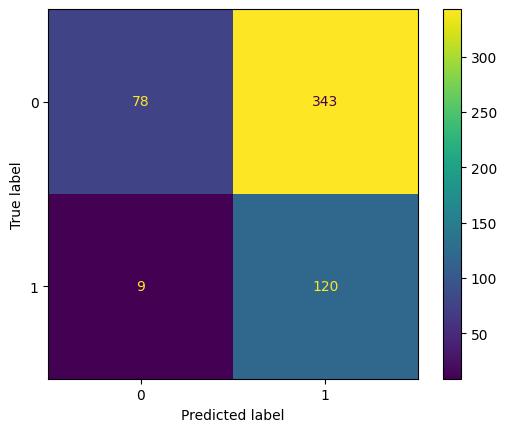

In [5]:
ConfusionMatrixDisplay(confusion_matrix(*get_golds_preds(data[0]))).plot()

In [6]:
recover_split([item['id_original'] for item in read_jsonl('results/clm_llama_nt.jsonl')[1] if item['gold'] == 1 and item['pred'] == 1], df)

[{'source': 'twitter',
  'subreddit': None,
  'id_original': '1534755822562967553',
  'text': '@Saralily24 Mine does, thank goodness 😅.',
  'parent_id_original': '1528728063105716227',
  'parent_text': 'Do men still cook &amp;wash the dishes????',
  'Language_instance': 'en',
  'label': 1},
 {'source': 'twitter',
  'subreddit': None,
  'id_original': '1537824575718932482',
  'text': '@dunkingwithfish 🥰',
  'parent_id_original': '1537824377647030272',
  'parent_text': '@ElaineARoche Hurrah! 👏👏👏👏 well done that boy!',
  'Language_instance': 'en',
  'label': 1},
 {'source': 'twitter',
  'subreddit': None,
  'id_original': '1537907713924997121',
  'text': '@for_grandson Has she been back since she was elected?',
  'parent_id_original': '1537649254558212103',
  'parent_text': "I live in a lovely village but it's in Nadine Dorries: constituency. Help! Pro  European, climate, love and compassion. #Followbackfriday #HumanRights  #FBFriday",
  'Language_instance': 'en',
  'label': 1},
 {'source

## Losses 

In [ ]:
def plot_loss(states):
    best_split = np.argmax([state['best_metric'] for state in states])
    states[best_split]
    losses = []

    for i in range(0, len(states[best_split]['log_history'])-1, 2):
        losses.append((i / 2, states[best_split]['log_history'][i]['loss'], 'train'))
        losses.append((i / 2, states[best_split]['log_history'][i+1]['eval_loss'], 'val'))
    

    losses_df = pd.DataFrame(losses, columns=['epoch', 'loss', 'train_val'])

    sns.lineplot(
        data = losses_df,
        x = 'epoch',
        y = 'loss',
        hue = 'train_val'
    )
    

In [ ]:
states = read_jsonl('results/roberta-irony-ft_loss.jsonl')
plot_loss(states)